# Exercício 6

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
data = fetch_20newsgroups()
data.target_names

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
cv = CountVectorizer()

mnb = MultinomialNB()

model = make_pipeline(cv, mnb)

In [4]:
model.fit(train.data, train.target)

labels = model.predict(test.data)

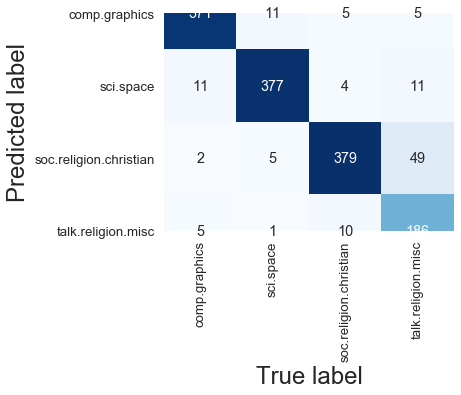

In [5]:
fig = plt.figure()
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

In [6]:
print(classification_report(test.target, labels, target_names=categories))

                        precision    recall  f1-score   support

    talk.religion.misc       0.95      0.95      0.95       389
soc.religion.christian       0.94      0.96      0.95       394
             sci.space       0.87      0.95      0.91       398
         comp.graphics       0.92      0.74      0.82       251

              accuracy                           0.92      1432
             macro avg       0.92      0.90      0.91      1432
          weighted avg       0.92      0.92      0.92      1432

